In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import numpy as np

In [3]:
#Import crime data
filepath = r'Resources\UCR76_17.csv'
crime_df = pd.read_csv(filepath)

In [4]:
#Import income data (2017)
filepath1 = r'Resources\kaggle_income2.xlsx'
income_df = pd.read_excel(filepath1)
#view income data
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [5]:
#filter crime data for year 2017 to match the income data
crime_df = crime_df.loc[crime_df['YEAR']==2017]

In [6]:
#Split of the state abbreviation from each of the counties on the crime dataframe
crime_df['County1'] = crime_df['County'].str.split(',').str[0]

In [7]:
# Add county to the end of each county entry in the crime dataframe to match the format of the income dataframe
crime_df['County'] = crime_df['County1'] + " " + 'County'

In [8]:
#Pivot on County and sum the murders to get the total amount of murders for the whole county
crime_df2 = crime_df.groupby(['County','State']).sum()[['MRD','CLR']]
#view the new table
crime_df2.head()

,,MRD,CLR
County,State,,
Abbeville County,South Carolina,1,0
Acadia County,Louisiana,7,4
Accomack County,Virginia,3,3
Ada County,Idaho,3,2
Adair County,Kentucky,2,2


In [9]:
#rename the State column on the income dataframe
income_df = income_df.rename(columns={'State_Name': 'State'})

In [10]:
#pivot the income data on County and State and grab the average salary by County
income_df2 = income_df.groupby(['County','State']).mean()['Mean']

In [15]:
#combine the crime dataframe and the income dataframe on their shared indices
combined_df2 = pd.merge(crime_df2, income_df2, left_index=True, right_index=True)
#pop out the index
combined_df2 = combined_df2.reset_index()
#view the new merged dataframe
combined_df2.head()

,County,State,MRD,CLR,Mean
0,Abbeville County,South Carolina,1,0,56507.667464
1,Accomack County,Virginia,3,3,79689.473973
2,Ada County,Idaho,3,2,57745.826772
3,Adair County,Kentucky,2,2,55499.625000
4,Adair County,Missouri,1,1,58124.035533


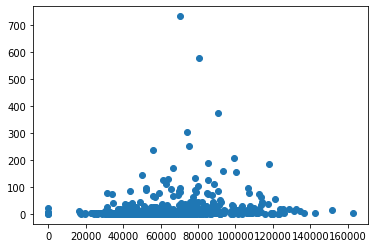

In [18]:
#Plot mean income vs quantity of murders
plt.scatter(combined_df2['Mean'], combined_df2['MRD'])

In [22]:
#Read in population data
population_by_county = pd.read_excel(r'Resources\population_by_county.xlsx')
#rename columns
population_by_county = population_by_county.rename(columns={'Geography':'State', 
                                                            'Geography.2':'County','Population Estimate - April 1, 2010 Estimates Base':'Population'})

In [23]:
#view population data
population_by_county.head()

,Id,Id2,State,Target Geo Id,Target Geo Id2,Geography.1,County,Population,"Population Estimate - July 1, 2017","Change, 2010 to 2017 - Number","Change, 2010 to 2017 - Percent [1]","Rankings - Population Estimate - April 1, 2010 Estimates Base","Rankings - Population Estimate - July 1, 2017","Rankings - Change, 2010 to 2017 - Number","Rankings - Change, 2010 to 2017 - Percent"
0,0400000US01,1,Alabama,0400000US01,1,Alabama,Alabama,4780135,4874747,94612,2.0,(X),(X),(X),(X)
1,0400000US01,1,Alabama,0500000US01001,1001,Alabama - Autauga County,Autauga County,54571,55504,933,1.7,23,24,14,15
2,0400000US01,1,Alabama,0500000US01003,1003,Alabama - Baldwin County,Baldwin County,182265,212628,30363,16.7,7,6,1,1
3,0400000US01,1,Alabama,0500000US01005,1005,Alabama - Barbour County,Barbour County,27457,25270,-2187,-8.0,39,41,61,61
4,0400000US01,1,Alabama,0500000US01007,1007,Alabama - Bibb County,Bibb County,22919,22668,-251,-1.1,45,45,30,31


In [30]:
#pivot the population dataframe on the County and State and sum the population 
new_population_df = population_by_county.groupby(['County','State']).sum()[['Population','Id2']]
#pop out the county and state from the index
new_population_df = new_population_df.reset_index()
#view the dataframe
new_population_df.head()

,County,State,Population,Id2
0,Abbeville County,South Carolina,25416,45
1,Acadia Parish,Louisiana,61770,22
2,Accomack County,Virginia,33164,51
3,Ada County,Idaho,392377,16
4,Adair County,Iowa,7682,19


In [31]:
#merge the population dataframe with the other combined dataframe
combined_df3 = pd.merge(combined_df2, new_population_df, left_on = ['County','State'], right_on = ['County','State'])
#Eliminate the unecessary rows
combined_df3 = combined_df3[['County', 'State', 'MRD', 'Mean', 'Population']]
#Rename the columns
combined_df3 = combined_df3.rename(columns={'Mean':'Average Household Income', 'Population':'Population (Estimate)'})

In [33]:
# Create new column per capita murder rate
combined_df3['Per Capita Murder Rate'] = (combined_df3['MRD']/ combined_df3['Population (Estimate)'])
combined_df3.sort_values(by = 'MRD', ascending = False)

,County,State,MRD,Average Household Income,Population (Estimate),Per Capita Murder Rate
183,Cook County,Illinois,733,70415.684211,5195075,0.000141
456,Los Angeles County,California,580,80469.625000,9818696,0.000059
326,Harris County,Texas,376,90458.500000,4093244,0.000092
834,Wayne County,Michigan,302,73988.333333,1820573,0.000166
480,Maricopa County,Arizona,251,75077.000000,3817361,0.000066
155,Clark County,Nevada,238,55938.000000,1951269,0.000122
205,Dallas County,Texas,207,98983.333333,2366776,0.000087
514,Miami-Dade County,Florida,188,85332.222222,2498018,0.000075
714,Shelby County,Tennessee,185,117661.000000,927683,0.000199
367,Jackson County,Missouri,170,66809.500000,674124,0.000252


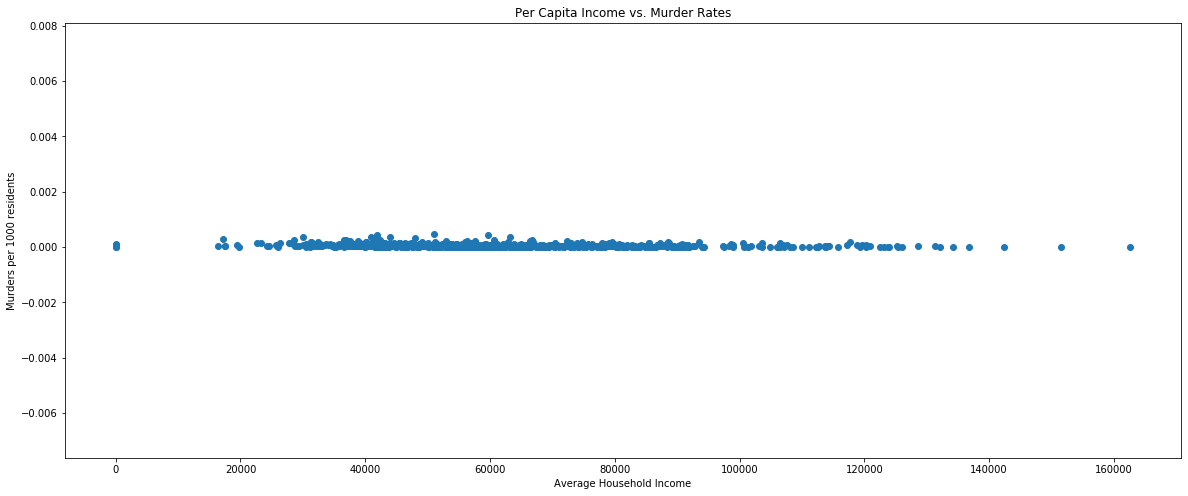

In [34]:
plt.scatter(combined_df3['Average Household Income'], combined_df3['Per Capita Murder Rate'])
plt.ylabel('Murders per 1000 residents')
plt.xlabel('Average Household Income')
plt.title('Per Capita Income vs. Murder Rates')
plt.rcParams["figure.figsize"] = (20,8)

AttributeError: 'PathCollection' object has no property 'fontsize'

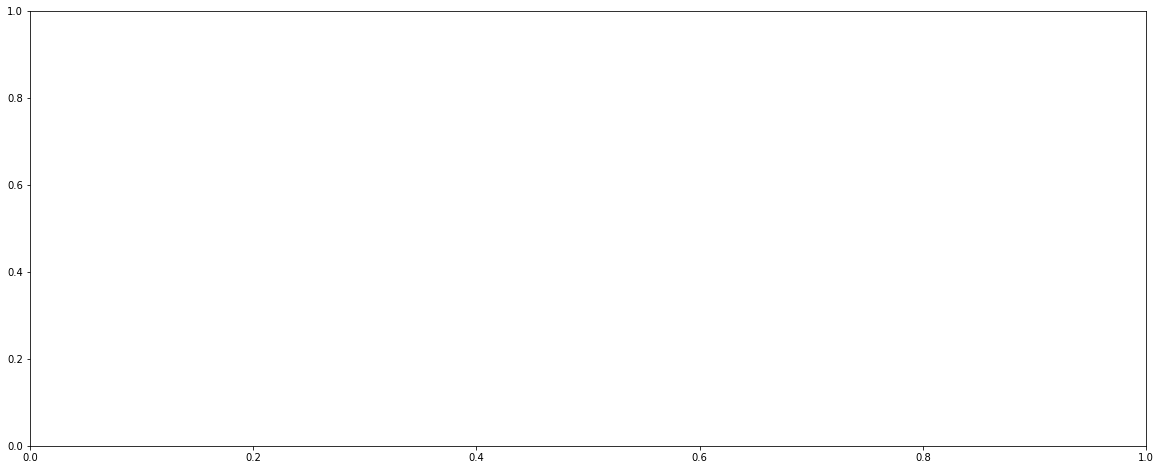

In [35]:
plt.scatter(combined_df3['Population (Estimate)'], combined_df3['MRD'], fontsize=20)
plt.ylabel('Murders per 1000 residents')
plt.xlabel('Population (Estimate)')
plt.title('Population vs. Murders (per 1000 residents)')

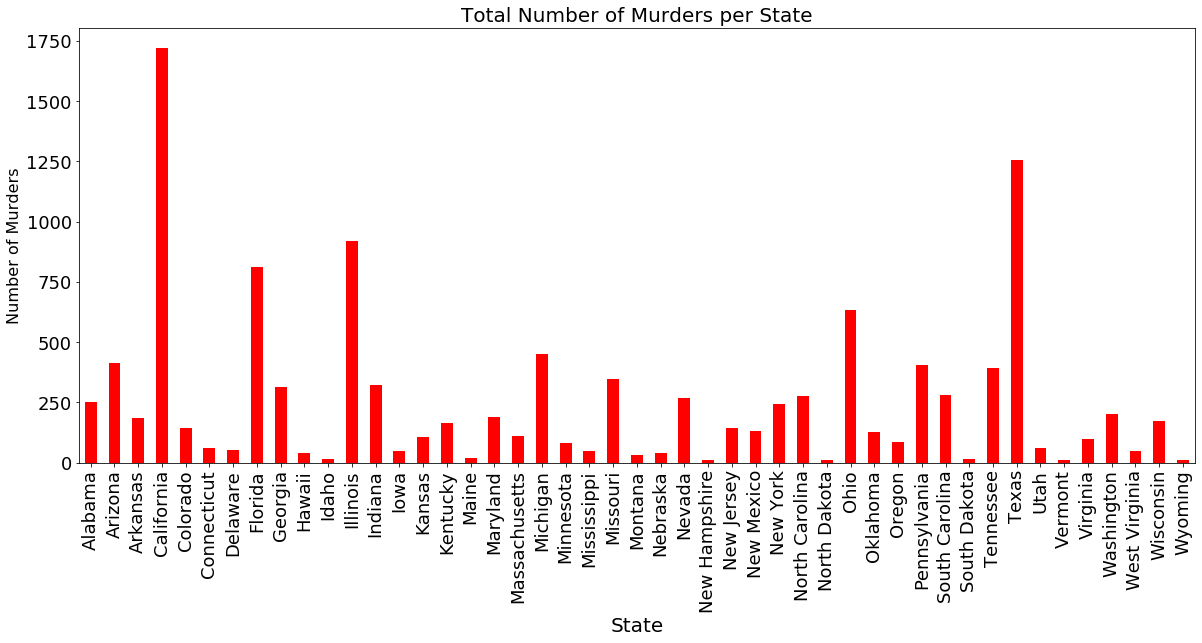

In [27]:
# Serenas Charts
#Combined Murder data by state
State_total = combined_df2.groupby("State")['MRD'].sum()
State_total
#Bar chart
Bar_chart = State_total.plot(kind='bar', color='red', fontsize=18)
Bar_chart.set_title("Total Number of Murders per State", fontsize=20)
Bar_chart.set_xlabel("State", fontsize=20)
Bar_chart.set_ylabel("Number of Murders", fontsize =16)
plt.rcParams["figure.figsize"] = (20,8)